In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data into a pandas dataframe
df = pd.read_csv('data/Airline_Delay_Cause.csv')

In [6]:
# Print the first 5 rows
print(df.head(3))

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0              5.99            2.0   
1        1.97        0.04  ...          0.0              7.42            0.0   
2        2.73        1.18  ...          0.0              4.28            1.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0     1375.0           71.0          761.0      118.0   
1  

**Data Dictionary**

- year: Year data collected
- month: Numeric representation of the month
- carrier: Carrier code
- carrier_name: Carrier Name
- airport: Airport code
- airport_name: Name of airport
- arr_flights: Number of flights arriving at the airport
- arr_del15: Number of flights more than 15 minutes late
- carrier_ct: Number of flights delayed due to air carrier. (e.g., no crew)
- weather_ct: Number of flights due to weather
- nas_ct: Number of flights delayed due to National Aviation System (e.g., heavy air traffic)
- security_ct: Number of flights canceled due to a security breach
- late_aircraft_ct: Number of flights delayed as a result of another flight on the same aircraft delayed
- arr_cancelled: Number of canceled flights
- arr_diverted: Number of flights that were diverted
- arr_delay: Total time (minutes) of delayed flight
- carrier_delay: Total time (minutes) of delay due to air carrier
- weather_delay: Total time (minutes) of delay due to inclement weather
- nas_delay: Total time (minutes) of delay due to National Aviation System
- security_delay: Total time (minutes) of delay due to a security issue
- late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight on the same airplane being late

Source Bureau of Transportation Statistics


In [4]:
# Print information about the data for an EDA
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345323 entries, 0 to 345322
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 345323 non-null  int64  
 1   month                345323 non-null  int64  
 2   carrier              345323 non-null  object 
 3   carrier_name         345323 non-null  object 
 4   airport              345323 non-null  object 
 5   airport_name         345323 non-null  object 
 6   arr_flights          344814 non-null  float64
 7   arr_del15            344576 non-null  float64
 8   carrier_ct           344814 non-null  float64
 9   weather_ct           344814 non-null  float64
 10  nas_ct               344814 non-null  float64
 11  security_ct          344814 non-null  float64
 12  late_aircraft_ct     344814 non-null  float64
 13  arr_cancelled        344814 non-null  float64
 14  arr_diverted         344814 non-null  float64
 15  arr_delay        

In [18]:
# Print the shape of the dataframe
print(f'Shape of the dataset: {df.shape}\n')

# Print the number of rows with missing values
print(f'Rows with missing values: {df.isnull().any(axis=1).sum()}\n')

# Print the number of missing values in each column
print(f'Missing values in each column:\n{df.isnull().sum()}\n')

Shape of the dataset: (345323, 21)

Rows with missing values: 747

Missing values in each column:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            509
arr_del15              747
carrier_ct             509
weather_ct             509
nas_ct                 509
security_ct            509
late_aircraft_ct       509
arr_cancelled          509
arr_diverted           509
arr_delay              509
carrier_delay          509
weather_delay          509
nas_delay              509
security_delay         509
late_aircraft_delay    509
dtype: int64



In [7]:
# Print the summary statistics of each column
print(df.describe())

                year          month    arr_flights      arr_del15  \
count  345323.000000  345323.000000  344814.000000  344576.000000   
mean     2013.206213       6.493312     378.935876      73.002383   
std         6.042778       3.431955    1021.719103     199.130487   
min      2003.000000       1.000000       1.000000       0.000000   
25%      2008.000000       4.000000      58.000000       9.000000   
50%      2013.000000       7.000000     120.000000      22.000000   
75%      2019.000000       9.000000     270.000000      56.000000   
max      2023.000000      12.000000   21977.000000    6377.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  344814.000000  344814.000000  344814.000000  344814.000000   
mean       21.416112       2.633833      23.581905       0.181689   
std        48.984100       9.906200      83.265625       0.853906   
min         0.000000       0.000000      -0.010000       0.000000   
25%         3.000000       0.0000

In [22]:
# Print number of airlines
print(f'Number of airlines: {df["carrier"].nunique()}\n')

# Print the number of rows per airline
print(f'Number of rows per airline:\n{df["carrier"].value_counts()}\n')

Number of carriers: 29

Number of rows per airline:
carrier
OO    42164
DL    29690
MQ    27295
EV    26799
AA    21591
UA    20794
WN    19181
YV    15417
AS    14220
9E    14047
OH    13965
F9    13568
B6    12573
US    10698
G4     8280
NW     8084
XE     7375
FL     6956
CO     6917
YX     5727
NK     4698
RU     4136
HA     3881
DH     1924
HP     1581
VX     1428
QX     1157
TZ      924
AQ      253
Name: count, dtype: int64



In [25]:
# List of columns to calculate mean
columns_to_mean = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 
                   'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 
                   'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Group by 'carrier' and calculate mean
df_mean = df.groupby('carrier')[columns_to_mean].mean()

# Print the resulting DataFrame
display(df_mean)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier,,,,,,,,,,,,,,,
9E,191.817695,30.056671,8.667412,1.115864,10.771883,0.029472,9.424918,4.628184,0.440314,1974.100678,647.826115,128.750054,506.502390,1.277845,689.744274
AA,654.647751,134.189388,39.604472,6.058700,45.854590,0.300064,42.328038,13.353963,1.845509,8469.652708,2748.228332,488.420577,2072.132117,14.059295,3146.812387
AQ,353.940711,25.193676,12.877391,0.160316,2.296364,0.211304,9.648419,4.644269,0.142292,1037.237154,572.814229,9.079051,62.976285,7.395257,384.972332
AS,249.036711,42.746870,11.911159,0.840955,16.018437,0.336723,13.636652,3.216471,0.680357,2115.519094,688.945073,63.503341,564.011956,12.061045,786.997679
B6,348.160461,84.591484,26.222087,1.393151,28.410203,0.310236,28.222196,6.611774,1.047653,5702.073270,1812.056404,156.916547,1502.785044,13.817422,2216.497852
CO,354.199450,77.772438,16.310093,2.632511,41.464287,0.534284,16.820158,2.951947,1.005790,4342.163265,938.030250,204.725431,2033.298162,17.799826,1148.309596
DH,296.767031,61.310972,13.562054,2.129048,21.608294,0.118274,23.893323,8.400936,0.502860,3657.647426,711.402496,182.768071,1104.009360,3.768591,1655.698908
DL,502.232799,80.581333,24.870479,2.605498,31.412381,0.073439,21.592334,5.869074,0.987818,4749.025915,1763.922220,252.288476,1346.678455,4.711726,1381.407862
EV,243.123198,54.615411,16.971304,2.746812,16.938992,0.041923,17.881700,7.186351,0.645865,3534.326433,1239.646614,222.127279,870.276270,1.986336,1200.289934


In [29]:
# Print number of airports
print(f'Number of airports: {df["airport"].nunique()}\n')

# Print the number of rows per airport
print(f'Number of rows per airport:\n{df["airport"].value_counts()}\n')

Number of airports: 420

Number of rows per airport:
airport
DTW    3243
MCI    3202
PIT    3193
RDU    3159
ATL    3155
LAS    3149
LAX    3144
DCA    3140
IND    3137
AUS    3135
BOS    3131
MSY    3131
PHX    3129
MSP    3097
SAN    3070
DFW    3069
PHL    3038
LGA    3027
DEN    3020
ORD    3007
STL    2941
BWI    2912
BNA    2909
CLE    2899
EWR    2883
SFO    2845
SEA    2842
IAD    2814
JAX    2810
OMA    2807
CLT    2804
CMH    2789
MCO    2764
SAT    2749
IAH    2744
PDX    2721
BDL    2658
BUF    2641
SMF    2637
SLC    2632
SJC    2590
RIC    2576
TPA    2533
OKC    2524
FLL    2483
MEM    2471
ABQ    2452
RSW    2444
ORF    2436
MKE    2417
ROC    2385
SNA    2345
CHS    2325
SDF    2275
PBI    2253
TUL    2223
PVD    2215
DSM    2208
TUS    2198
JFK    2182
OAK    2172
SYR    2155
MIA    2154
ALB    2144
ONT    2137
RNO    2087
GRR    2071
CVG    2066
BHM    2025
ICT    1982
SAV    1970
DAY    1967
ELP    1903
LIT    1896
PWM    1812
GEG    1808
BOI    1771
MDT    1747
GSO

In [28]:
# Change display options to show all rows
pd.set_option('display.max_rows', None)

# List of columns to calculate mean
columns_to_mean = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 
                   'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 
                   'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Group by 'airport' and calculate mean
df_mean = df.groupby('airport')[columns_to_mean].mean()

# Display the resulting DataFrame
display(df_mean)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
airport,,,,,,,,,,,,,,,
ABE,69.664650,13.789974,5.343846,1.001677,3.202282,0.020640,4.221538,1.807260,0.178911,842.172861,332.575627,78.738980,136.919620,1.260156,292.678479
ABI,159.936170,32.109929,12.914433,3.456064,5.627340,0.056560,10.055213,3.744681,0.170213,1734.606383,597.911348,295.507092,234.712766,2.354610,604.120567
ABQ,235.530012,44.984477,16.193597,1.215864,7.867211,0.140449,19.549020,2.305431,0.332789,2211.503879,766.061249,91.939976,284.998775,4.855043,1063.648836
ABR,60.550000,6.164286,2.855071,0.702429,1.267857,0.000000,1.339214,1.071429,0.207143,479.235714,227.592857,111.857143,44.435714,0.000000,95.350000
ABY,87.322449,16.840816,7.003306,1.545510,3.619469,0.024776,4.647796,1.546939,0.179592,973.877551,429.187755,129.567347,150.469388,1.465306,263.187755
ACK,68.378378,14.378378,5.212486,1.272486,3.963135,0.019297,3.911027,2.551351,0.497297,1057.935135,367.416216,145.016216,204.378378,0.810811,340.313514
ACT,128.288973,20.870722,9.030951,1.752243,3.513080,0.022624,6.552205,4.079848,0.102662,1068.676806,448.851711,123.076046,130.574144,1.577947,364.596958
ACV,225.267490,51.670782,20.191399,2.284774,5.842675,0.036667,23.315103,9.106996,1.621399,3199.098765,1168.390947,240.115226,247.950617,1.074074,1541.567901
ACY,154.886364,30.900000,8.486455,1.292318,12.808091,0.333136,7.979955,3.659091,0.268182,2087.227273,504.313636,102.063636,815.377273,13.045455,652.427273


The following dendrogram creates a hierarchical clustering of the correlation matrix. This code displays a clustering plot where each cell corresponds to the correlation between two of the selected columns in the DataFrame. The color of the cell indicates the strength and direction of the correlation. The rows and columns are reordered to show the hierarchical clustering.

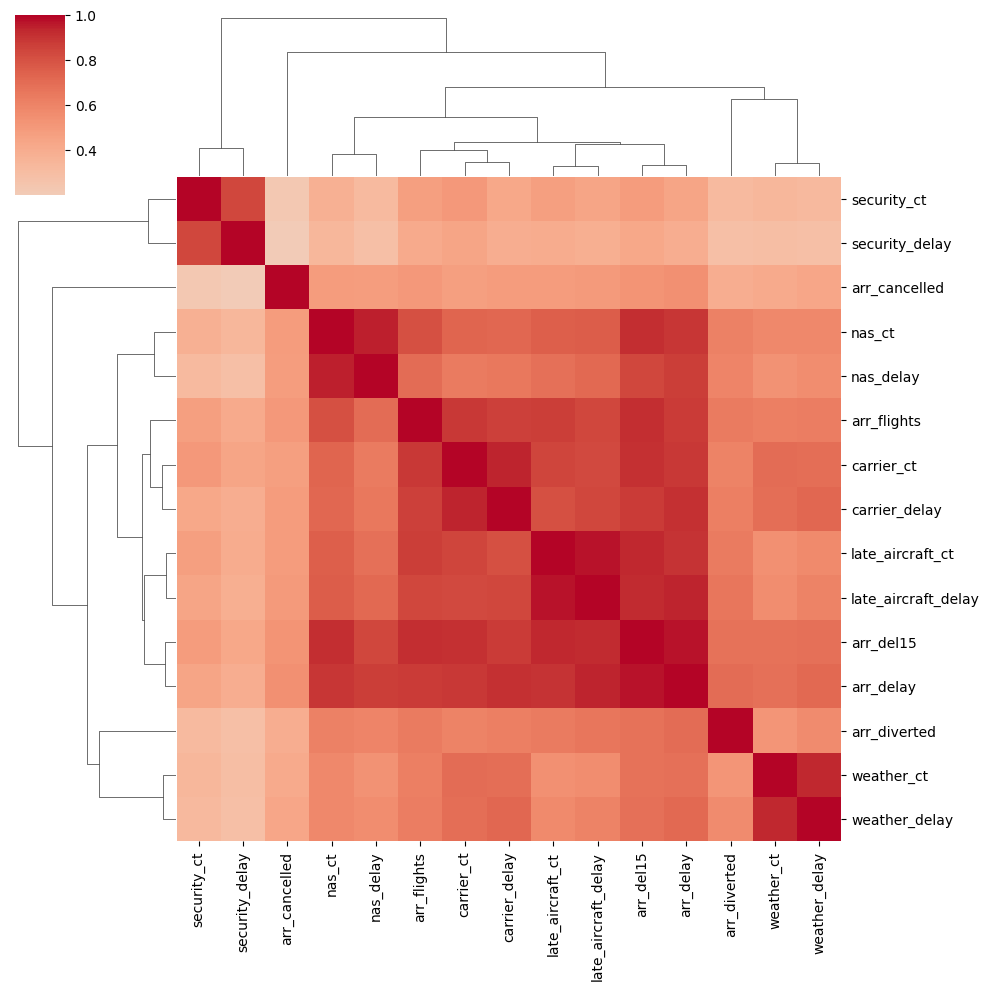

In [39]:
# Correlation matrix

# List of columns to include in the correlation plot
columns_to_include = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 
                   'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 
                   'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Select these columns
df_selected = df[columns_to_include]

# Calculate correlation matrix
corr = df_selected.corr()

# Create a clustering plot
sns.clustermap(corr, cmap='coolwarm', center=0)

plt.show()